
Описание проекта
Вы работаете в интернет-магазине «Стримчик», который продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы. Вам нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.

Перед вами данные до 2016 года. Представим, что сейчас декабрь 2016 г., и вы планируете кампанию на 2017-й. Нужно отработать принцип работы с данными.


## Изучение общей информации

In [323]:
import pandas as pd
import matplotlib.pyplot as plt

Открою датафрейм и рассмотрю основную информацию

In [324]:
data = pd.read_csv('/datasets/games.csv')
data.head()

Name Platform  Year_of_Release         Genre  NA_sales  \
0                Wii Sports      Wii           2006.0        Sports     41.36   
1         Super Mario Bros.      NES           1985.0      Platform     29.08   
2            Mario Kart Wii      Wii           2008.0        Racing     15.68   
3         Wii Sports Resort      Wii           2009.0        Sports     15.61   
4  Pokemon Red/Pokemon Blue       GB           1996.0  Role-Playing     11.27   

   EU_sales  JP_sales  Other_sales  Critic_Score User_Score Rating  
0     28.96      3.77         8.45          76.0          8      E  
1      3.58      6.81         0.77           NaN        NaN    NaN  
2     12.76      3.79         3.29          82.0        8.3      E  
3     10.93      3.28         2.95          80.0          8      E  
4      8.89     10.22         1.00           NaN        NaN    NaN

In [325]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


## Подготовка данных

### Приведу названия столбцов к нижнему регистру

In [326]:
data.columns = data.columns.str.lower()
data.head()

name platform  year_of_release         genre  na_sales  \
0                Wii Sports      Wii           2006.0        Sports     41.36   
1         Super Mario Bros.      NES           1985.0      Platform     29.08   
2            Mario Kart Wii      Wii           2008.0        Racing     15.68   
3         Wii Sports Resort      Wii           2009.0        Sports     15.61   
4  Pokemon Red/Pokemon Blue       GB           1996.0  Role-Playing     11.27   

   eu_sales  jp_sales  other_sales  critic_score user_score rating  
0     28.96      3.77         8.45          76.0          8      E  
1      3.58      6.81         0.77           NaN        NaN    NaN  
2     12.76      3.79         3.29          82.0        8.3      E  
3     10.93      3.28         2.95          80.0          8      E  
4      8.89     10.22         1.00           NaN        NaN    NaN

Изучу данные в различных столбцах

In [327]:
data['year_of_release'].unique()

array([2006., 1985., 2008., 2009., 1996., 1989., 1984., 2005., 1999.,
       2007., 2010., 2013., 2004., 1990., 1988., 2002., 2001., 2011.,
       1998., 2015., 2012., 2014., 1992., 1997., 1993., 1994., 1982.,
       2016., 2003., 1986., 2000.,   nan, 1995., 1991., 1981., 1987.,
       1980., 1983.])

In [328]:
data['critic_score'].unique()

array([76., nan, 82., 80., 89., 58., 87., 91., 61., 97., 95., 77., 88.,
       83., 94., 93., 85., 86., 98., 96., 90., 84., 73., 74., 78., 92.,
       71., 72., 68., 62., 49., 67., 81., 66., 56., 79., 70., 59., 64.,
       75., 60., 63., 69., 50., 25., 42., 44., 55., 48., 57., 29., 47.,
       65., 54., 20., 53., 37., 38., 33., 52., 30., 32., 43., 45., 51.,
       40., 46., 39., 34., 35., 41., 36., 28., 31., 27., 26., 19., 23.,
       24., 21., 17., 22., 13.])

In [329]:
data['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

In [330]:
data['rating'].unique()

array(['E', nan, 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'], dtype=object)

In [331]:
data['genre'].unique()

array(['Sports', 'Platform', 'Racing', 'Role-Playing', 'Puzzle', 'Misc',
       'Shooter', 'Simulation', 'Action', 'Fighting', 'Adventure',
       'Strategy', nan], dtype=object)

### Обработаю пропуски

In [332]:
data.isna().sum()

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         6701
rating             6766
dtype: int64

В столбце 'name' и 'genre' всего по 2 пропуска, так как это составляет 0,02%, то удалю эти строки
В столбце 'year_of_release' 269 пропусков, что составляет 1,6%, удалю эти строки

Так как эти пропуски занимают менее 10 % (даже менее 5%), удаление существенно не повлияет на ход исследования.

In [333]:
data = data.dropna(subset=['name', 'year_of_release', 'genre' ])

В столбце 'user_score' есть  значение 'tbd' To Be Determined, то есть "Будет определено". Заменю 'tbd' на Nan. 

In [334]:
data['user_score'] = pd.to_numeric(data['user_score'], errors='coerce')

В столбцах 'critic_score' и 'user_score' значительное количество пропусков ('critic_score' - 51% 'user_score'-40%). Пока я оставлю эти пропуски, посмотрю на дальнейшее исследование. Данные нельзя делать искуственными, так как они не являются набором случайных наблюдений и могут повлиять на выводы.

In [336]:
data.isna().sum() #проверка

name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8461
user_score         8981
rating             6676
dtype: int64

In [337]:
data.duplicated().sum()#проверка строк на наличие дубликатов

0

### Изменю тип стольбца на целочисленный

In [338]:
data['year_of_release'] = data['year_of_release'].astype(int)
data.info()# проверка

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  int64  
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       7463 non-null   float64
 10  rating           9768 non-null   object 
dtypes: float64(6), int64(1), object(4)
memory usage: 1.5+ MB


### Посчитаю суммарные продажи во всех регионах и запишу их в отдельный столбец

In [339]:
data['sum_sales'] = data['na_sales']+data['eu_sales']+data['jp_sales']+data['other_sales']
data.head()

name platform  year_of_release         genre  na_sales  \
0                Wii Sports      Wii             2006        Sports     41.36   
1         Super Mario Bros.      NES             1985      Platform     29.08   
2            Mario Kart Wii      Wii             2008        Racing     15.68   
3         Wii Sports Resort      Wii             2009        Sports     15.61   
4  Pokemon Red/Pokemon Blue       GB             1996  Role-Playing     11.27   

   eu_sales  jp_sales  other_sales  critic_score  user_score rating  sum_sales  
0     28.96      3.77         8.45          76.0         8.0      E      82.54  
1      3.58      6.81         0.77           NaN         NaN    NaN      40.24  
2     12.76      3.79         3.29          82.0         8.3      E      35.52  
3     10.93      3.28         2.95          80.0         8.0      E      32.77  
4      8.89     10.22         1.00           NaN         NaN    NaN      31.38

In [340]:
data.shape

(16444, 12)

### Вывод

Пропуски в данных могут быть по разным причинам. Человеческий фактор (например забыл поставить галочку в окне) или техническая ошибка или сбой. Возможно, данные были предоставлены некорректно (выгружены). 

После предобработки данных осталось 16 444 строк. Удалено 1,62% данных, потеря при обработке считается оптимальной (до 5%).

## Исследовательский анализ данных

### Определение актуального периода и топовых платформ.

Посмотрю, сколько игр выпускалось в разные годы.

In [342]:
data['year_of_release'].value_counts().head(15)

2008    1427
2009    1426
2010    1255
2007    1197
2011    1136
2006    1006
2005     939
2002     829
2003     775
2004     762
2012     653
2015     606
2014     581
2013     544
2016     502
Name: year_of_release, dtype: int64

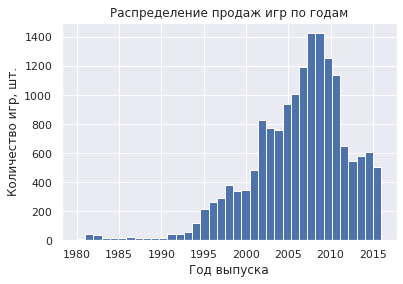

In [343]:
data['year_of_release'].plot(x = 'year_of_release', kind ='hist', bins=37, title ='Распределение продаж игр по годам', grid = True)#построим гистограмму
plt.xlabel('Год выпуска')
plt.ylabel("Количество игр, шт.");

Лидирующим годом по выпуску игр был 2008-2009. Также можно отметить пики До 200 игр выпускают крайне редко (хвост до 1995 года).


Посмотрю, как менялись продажи по платформам. Выберу платформы с наибольшими суммарными продажами и построю распределение по годам. Рассмотрю срок жизни платформы

In [344]:
platform_top = data.groupby('platform').agg(sum_sales=('sum_sales', 'sum'))
platform_top = platform_top.sort_values(by='sum_sales', ascending=False).reset_index()
platform_top

platform  sum_sales
0       PS2    1233.56
1      X360     961.24
2       PS3     931.34
3       Wii     891.18
4        DS     802.78
5        PS     727.58
6       PS4     314.14
7       GBA     312.88
8       PSP     289.53
9       3DS     257.81
10       PC     255.76
11       GB     254.43
12       XB     251.57
13      NES     251.05
14      N64     218.01
15     SNES     200.04
16       GC     196.73
17     XOne     159.32
18     2600      86.48
19     WiiU      82.19
20      PSV      53.81
21      SAT      33.59
22      GEN      28.35
23       DC      15.95
24      SCD       1.86
25       NG       1.44
26       WS       1.42
27     TG16       0.16
28      3DO       0.10
29       GG       0.04
30     PCFX       0.03

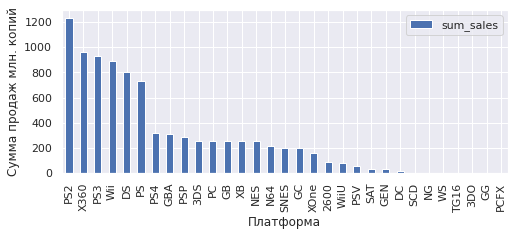

In [345]:
platform_top.plot.bar(x='platform', figsize=(8,3));
plt.xlabel('Платформа')
plt.ylabel("Сумма продаж млн. копий");

В соответствии с суммарными продажами построю распределение продаж по годам (выбрала первые 18).

In [346]:
platform_top18 = ['PS2', 'X360', 'Wii', 'PS3', 'DS', 'PS', 'GBA', 'PS4', 'PSP', 'GB','PS4','PSP',\
                  'GB','NES','3DS','XB','PC','N64','SNES','GC','XOne']
platform_top = data.groupby(['platform', 'year_of_release']).agg(sum_sales=('sum_sales', 'sum'))
platform_top = platform_top.query('platform == @platform_top18')
platform_top

sum_sales
platform year_of_release           
3DS      2011                 63.20
         2012                 51.36
         2013                 56.57
         2014                 43.76
         2015                 27.78
...                             ...
XB       2008                  0.18
XOne     2013                 18.96
         2014                 54.07
         2015                 60.14
         2016                 26.15

[185 rows x 1 columns]

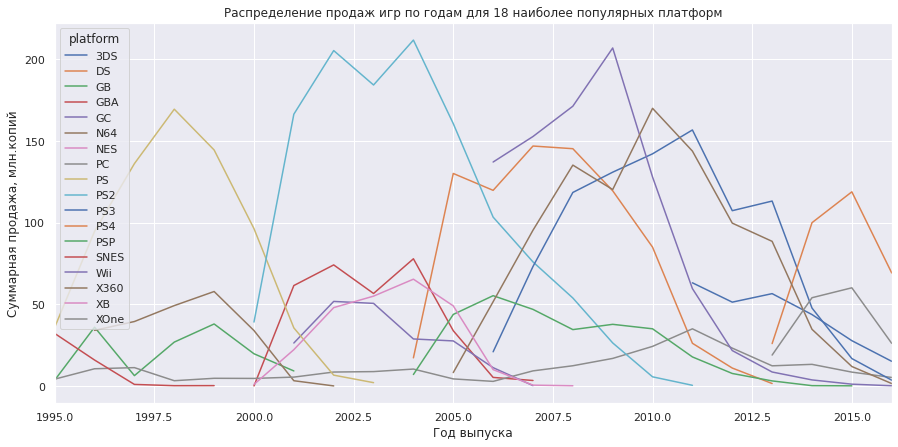

In [347]:
platform_top.pivot_table(index='year_of_release', columns = 'platform', values='sum_sales').plot(grid=True, figsize=(15, 7),\
        xlim=(1995,2016), title ='Распределение продаж игр по годам для 18 наиболее популярных платформ')
plt.xlabel('Год выпуска')
plt.ylabel("Суммарная продажа, млн.копий");

По графику можно заметить, что срок "жизни" платформы примерно 8-10 лет.
Для дальнейшей работы буду использовать промежуток с 2014 года, так как в этот период попадают платформы, которые до сих пор "держатся на плаву" (PS4, XOne и т.д.)

Рассмотрю подробнее последние годы (2014-2016), построю график.
Изначально определю лидирующие платформы в эти годы.

In [348]:
actual_period = data.query('year_of_release > 2013')
platform_top_actual_period = actual_period.groupby('platform').agg(sum_sales=('sum_sales', 'sum'))
platform_top_actual_period = platform_top_actual_period.sort_values(by='sum_sales', ascending=False)
platform_top_actual_period.head(10)

sum_sales
platform           
PS4          288.15
XOne         140.36
3DS           86.68
PS3           68.18
X360          48.22
WiiU          42.98
PC            27.05
PSV           22.40
Wii            5.07
PSP            0.36

Выберу первые 6 платформ.

In [349]:
actual_platform_top6 = ['PS4','XOne','3DS','PS3','X360','WiiU']
actual_platform = actual_period.groupby(['platform', 'year_of_release']).agg(sum_sales=('sum_sales', 'sum'))
actual_platform_top6_v = actual_platform.query('platform == @actual_platform_top6')
actual_platform_top6_v

sum_sales
platform year_of_release           
3DS      2014                 43.76
         2015                 27.78
         2016                 15.14
PS3      2014                 47.76
         2015                 16.82
         2016                  3.60
PS4      2014                100.00
         2015                118.90
         2016                 69.25
WiiU     2014                 22.03
         2015                 16.35
         2016                  4.60
X360     2014                 34.74
         2015                 11.96
         2016                  1.52
XOne     2014                 54.07
         2015                 60.14
         2016                 26.15

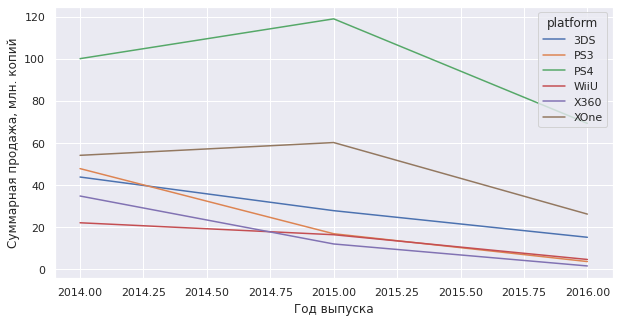

In [350]:
actual_platform_top6_v.pivot_table(index='year_of_release', columns = 'platform', values='sum_sales').\
    plot(grid=True, figsize=(10, 5));
plt.xlabel('Год выпуска')
plt.ylabel("Суммарная продажа, млн. копий");

По графику видно, что 2015 год был переломным, даже у патформы PS4 начался спад продаж, продажи по всем платформам падают.
Лидирующие платформы PS4 и XOne, считаю их потенциально прибыльными.

Построю график «ящик с усами» по глобальным продажам игр в разбивке по платформам

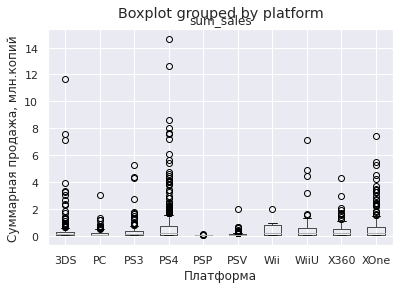

In [351]:
actual_period = data.query('year_of_release > 2013')
actual_period.boxplot(column='sum_sales', by='platform');
plt.xlabel('Платформа')
plt.ylabel("Суммарная продажа, млн.копий");

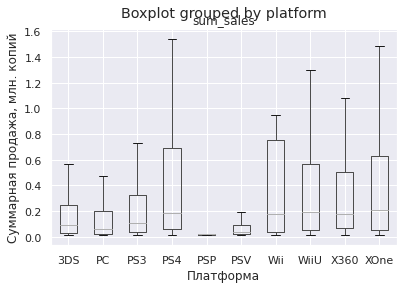

In [352]:
actual_period.boxplot(column='sum_sales', by='platform',showfliers=False);
plt.xlabel('Платформа')
plt.ylabel("Суммарная продажа, млн. копий");

Просмотрев общую диаграмму размаха вижу выбросы, но считаю, что их нужно оставить, так как могли быть игры, которы очень хорошо продавались.
Медиана у всех платформ находится в пределах 0,2 млн.копий. Наиболее продаваемые платформы XOne и PS4.
XOne:среднее значение - 0,19, межквартильный размах 0,05-0,58, пределы нормальных значений 0-1,375 (продажи меньше 0 быть не могут) (значения в миллионах проданных копий)
PS4:среднее значение - 0,16, межквартильный размах 0,05-0,58, пределы нормальных значений 0-1,375  (продажи меньше 0 быть не могут) (значения в миллионах проданных копий)

In [353]:
data.loc[(data['platform'] == 'XOne') & (data['year_of_release'] > 2013)].describe()

year_of_release    na_sales    eu_sales    jp_sales  other_sales  \
count       228.000000  228.000000  228.000000  228.000000   228.000000   
mean       2015.114035    0.356447    0.202851    0.001404     0.054912   
std           0.799325    0.634756    0.371972    0.005289     0.095065   
min        2014.000000    0.000000    0.000000    0.000000     0.000000   
25%        2014.000000    0.030000    0.020000    0.000000     0.000000   
50%        2015.000000    0.100000    0.070000    0.000000     0.020000   
75%        2016.000000    0.352500    0.210000    0.000000     0.052500   
max        2016.000000    4.590000    2.190000    0.040000     0.680000   

       critic_score  user_score   sum_sales  
count    155.000000  165.000000  228.000000  
mean      73.793548    6.594545    0.615614  
std       12.252589    1.375139    1.046513  
min       20.000000    1.600000    0.010000  
25%       66.500000    5.800000    0.050000  
50%       76.000000    6.800000    0.205000  
75%       83.000000    7.600000    0.632500  
max       97.000000    9.200000    7.390000

In [354]:
data.loc[(data['platform'] == 'PS4') & (data['year_of_release'] > 2013)].describe()

year_of_release    na_sales    eu_sales    jp_sales  other_sales  \
count       376.000000  376.000000  376.000000  376.000000   376.000000   
mean       2015.236702    0.262261    0.345851    0.039947     0.118298   
std           0.762336    0.583439    0.815480    0.067048     0.256506   
min        2014.000000    0.000000    0.000000    0.000000     0.000000   
25%        2015.000000    0.000000    0.000000    0.000000     0.000000   
50%        2015.000000    0.050000    0.070000    0.015000     0.020000   
75%        2016.000000    0.240000    0.280000    0.050000     0.102500   
max        2016.000000    6.030000    6.310000    0.490000     2.380000   

       critic_score  user_score   sum_sales  
count    237.000000  242.000000  376.000000  
mean      72.164557    6.828099    0.766356  
std       12.214985    1.399035    1.614969  
min       19.000000    1.500000    0.010000  
25%       66.000000    6.200000    0.057500  
50%       73.000000    7.100000    0.185000  
75%       80.000000    7.875000    0.690000  
max       97.000000    9.200000   14.630000

### Посмотрю, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. 
Построю диаграмму рассеяния и посчитаю корреляцию между оценками критиков и продажами и между оценками пользователей и продажами.

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


0.40266141068104083


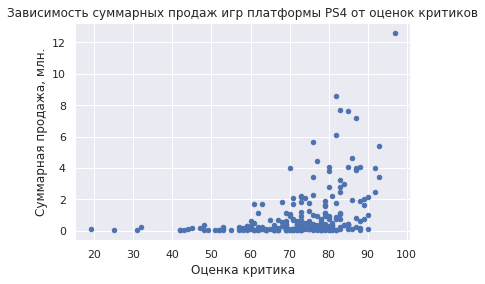

In [355]:
crit = actual_period.loc[actual_period['critic_score'].notna()]
crit = crit.query('platform == "PS4"')
crit.plot(x='critic_score', y='sum_sales', kind='scatter', title ='Зависимость суммарных продаж игр платформы PS4 от оценок критиков')
plt.xlabel('Оценка критика')
plt.ylabel("Суммарная продажа, млн.");
print(crit['critic_score'].corr(crit['sum_sales']))#считаю коэффициент корреляции Пирсона

Коэффициент корреляции равен 0,4, что говорит о существовании слабой линейной зависимости между продажами и оценкой критиков.
По графику мы видим, что наиболее продаваемые игры имеют оценки критиков примерно 60-90, также в диапазоне этих оценок большее число игр платформы. Получается, что игры с высокими оценками критиков более продаваемые.

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


-0.04318585997193634


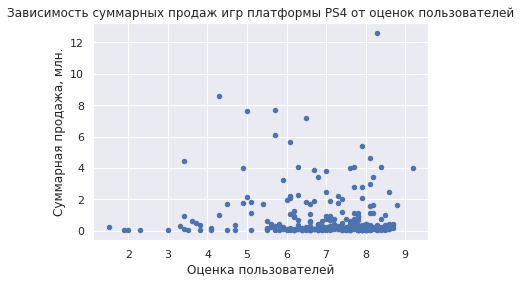

In [356]:
user = actual_period.loc[actual_period['user_score'].notna()]
user = user.query('platform == "PS4"')
user.plot(x='user_score', y='sum_sales', kind='scatter', title ='Зависимость суммарных продаж игр платформы PS4 от оценок пользователей')
plt.xlabel('Оценка пользователей')
plt.ylabel("Суммарная продажа, млн.");
print(crit['user_score'].corr(crit['sum_sales']))#считаю коэффициент корреляции Пирсона

Коэффициент корреляции равен -0,04 (слабо отрицательный), что говорит об отсутствии линейной связи между продажами и оценкой пользователей. Возможно это связано с тем, что покупатели больше основываются на оценках популярных критиков, нежелина оценках пользователей или оценки ставят небольшой процент покупателей.
По графику видим, что у игр платформы наиболее распространены оценки пользователей от 5-9, хотя наибольшие суммарные продажи имеют оценки 4-9. Получается, что игры с высокими оценками пользователей более продаваемые.

Построю диаграммы рассеяния для других платформ, для того, чтобы посмотреть похожие ли графики для других платформ. 

In [357]:
data.isna().sum()

name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8461
user_score         8981
rating             6676
sum_sales             0
dtype: int64

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB o

Коэф. корр. Пирсона платформы 3DS (зависимость продаж от оценок критиков) 0.31412
Коэф. корр. Пирсона платформы 3DS (зависимость продаж от оценок пользователей) 0.21519
Коэф. корр. Пирсона платформы PS3 (зависимость продаж от оценок критиков) 0.44657
Коэф. корр. Пирсона платформы PS3 (зависимость продаж от оценок пользователей) -0.16676
Коэф. корр. Пирсона платформы X360 (зависимость продаж от оценок критиков) 0.52572


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


Коэф. корр. Пирсона платформы X360 (зависимость продаж от оценок пользователей) -0.13844
Коэф. корр. Пирсона платформы WiiU (зависимость продаж от оценок критиков) 0.3702
Коэф. корр. Пирсона платформы WiiU (зависимость продаж от оценок пользователей) 0.40793


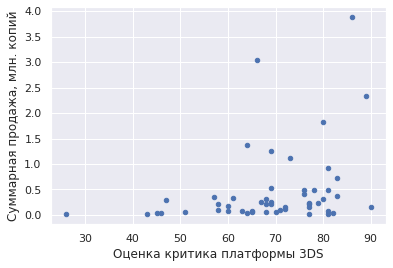

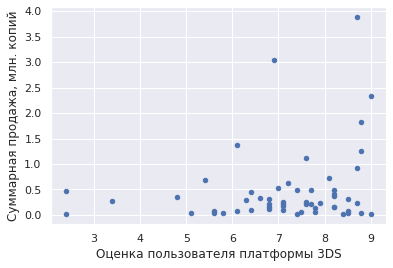

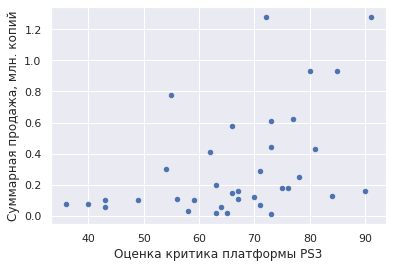

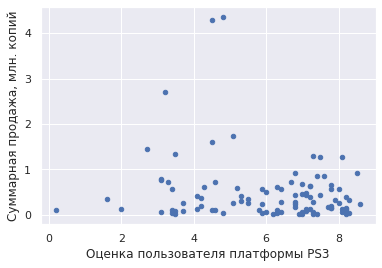

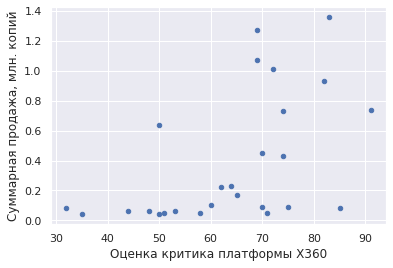

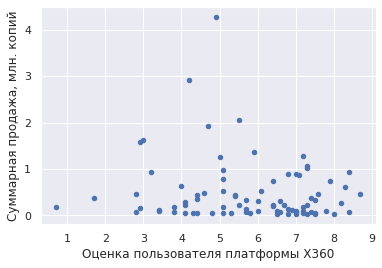

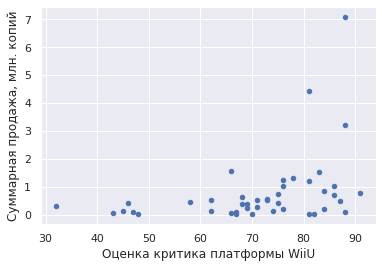

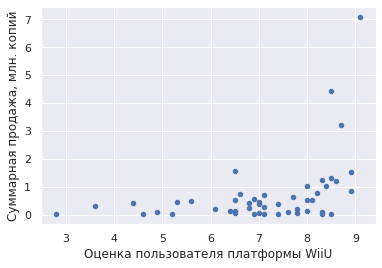

In [358]:
e1 = actual_period.loc[actual_period['critic_score'].notna()]
ee1 = actual_period.loc[actual_period['user_score'].notna()]
actual_platform_4 = ['3DS','PS3','X360','WiiU']
for platform in actual_platform_4:
    e = e1.query(f'platform == "{platform}"')
    e.plot(x='critic_score', y='sum_sales', kind='scatter')
    plt.xlabel(f'Оценка критика платформы {platform}')
    plt.ylabel("Суммарная продажа, млн. копий");
    print(f'Коэф. корр. Пирсона платформы {platform} (зависимость продаж от оценок критиков) {e["critic_score"].corr(e["sum_sales"]).round(5)}')#считаю коэффициент корреляции Пирсона
    ee = ee1.query(f'platform == "{platform}"')
    ee.plot(x='user_score', y='sum_sales', kind='scatter')
    plt.xlabel(f'Оценка пользователя платформы {platform}')
    plt.ylabel("Суммарная продажа, млн. копий");
    print(f'Коэф. корр. Пирсона платформы {platform} (зависимость продаж от оценок пользователей) {ee["user_score"].corr(ee["sum_sales"]).round(5)}')#считаю коэффициент корреляции Пирсона
          #Коэффициент корреляции Пирсона платформы PS 0.1

На мой взгляд выводы применими и к другим платформам, видна наибольшая популярность у игр с оценкой критиков, примерно, 65-90, пользователей примерно 7-9, наиболее продаваемые игры также соответствуют этой оценке, но линейная зависимость очень слабая.

После того, как я убрала заполнение медианами, я вижу как изменился разброс данных для платформ X360, WiiU, PS3. 
    Видна наибольшая популярность у игр с оценкой критиков, примерно, 50-90, пользователей примерно 2,5-9, наиболее продаваемые игры также соответствуют этой оценке, но линейная зависимость все равно очень слабая.

### Посмотрю на общее распределение игр по жанрам. Определю самые прибыльные жанры. 


In [359]:
actual_period['genre'].value_counts().head(7)#Выберу самые популярные жанры (самые распространенные) для актуального периода 

Action          619
Role-Playing    221
Adventure       185
Sports          161
Shooter         128
Misc            113
Racing           69
Name: genre, dtype: int64

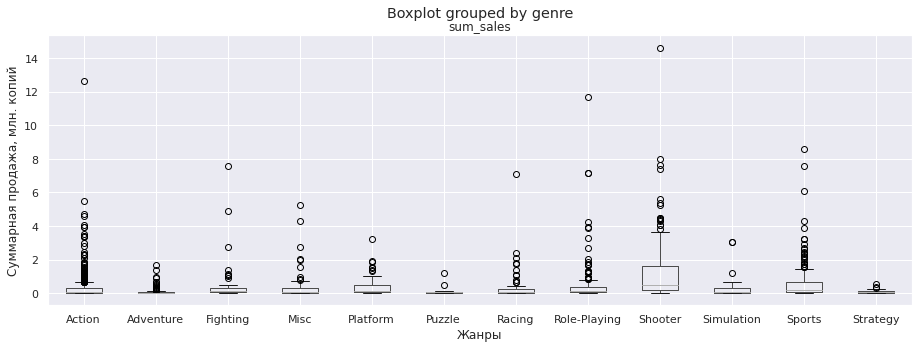

In [360]:
actual_period.boxplot(column='sum_sales', by='genre', figsize=(15,5));
plt.xlabel('Жанры')
plt.ylabel("Суммарная продажа, млн. копий");

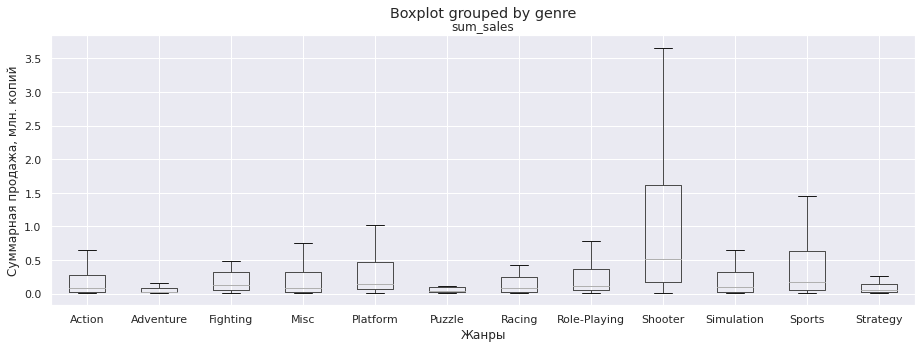

In [361]:
actual_period.boxplot(column='sum_sales', by='genre', figsize=(15,5), showfliers=False);
plt.xlabel('Жанры')
plt.ylabel("Суммарная продажа, млн. копий");

In [362]:
genre_max_sum_sales=actual_period.groupby(['genre']).agg(sum_sales=('sum_sales', 'median')). sort_values(by='sum_sales', ascending=False).reset_index()#Выберу самые прибыльные жанры (по сумме проданных копий)
genre_max_sum_sales.head(7)

genre  sum_sales
0       Shooter      0.515
1        Sports      0.180
2      Platform      0.140
3      Fighting      0.125
4  Role-Playing      0.110
5    Simulation      0.100
6        Action      0.090

Cамый популярный жанр и самый прибыльный совпадают.
Топ 5 самых популярных жанров:
 Action          
 Role-Playing    
 Adventure       
 Sports          
 Shooter  

Топ-5 прибыльных жанров: -Shooter
-Sports
-Platform

-Fighting
-Role-Playing

Получается популярные и самые прибыльные жанры не совсем совпадают.

## Портрет пользователя каждого региона

### Определю для пользователя каждого региона (NA, EU, JP) самые популярные платформы (топ-5) и доли продаж.

Рассмотрю продажи и платформы в Северной Америке для нашей выборки (2014-2016 год)

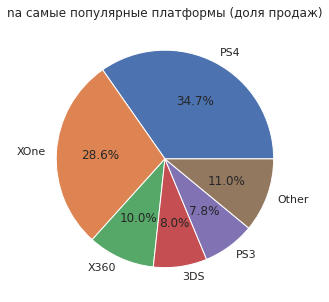

In [363]:
na_v = actual_period.loc[actual_period['na_sales']>0].groupby('platform')['na_sales'].sum().sort_values(ascending=False).reset_index()

TOP = 5
df2 = na_v.iloc[:TOP]
df2 = df2.append({'platform': 'Other', 'na_sales': na_v['na_sales'].iloc[TOP:].sum()},
                 ignore_index=True)
df2.set_index('platform').plot.pie(y='na_sales', legend=False, label="", figsize=(5,5), autopct='%1.1f%%', title = 'na самые популярные платформы (доля продаж)');

In [364]:
platform_count_full = na_v['na_sales'].sum()
na_v['persent'] = (na_v['na_sales']/platform_count_full*100).round(2)

Самые популярные платформы Северной Америки: PS4, XOne, X360, 3DS, PS3. Интересно, что если рассматривать долю продаж, то платформы немно меняются местами, но остаются те же топ 5 платформ.

Рассмотрю продажи и платформы в Европе для нашей выборки (2014-2016 год)

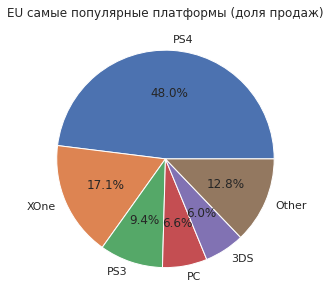

In [365]:
eu_v = actual_period.loc[actual_period['eu_sales']>0].groupby('platform')['eu_sales'].sum().sort_values(ascending=False).reset_index()

TOP = 5
df2 = eu_v.iloc[:TOP]
df2 = df2.append({'platform': 'Other', 'eu_sales': eu_v['eu_sales'].iloc[TOP:].sum()},
                 ignore_index=True)
df2.set_index('platform').plot.pie(y='eu_sales', legend=False, label="", autopct='%1.1f%%', figsize=(5,5), title = 'EU самые популярные платформы (доля продаж)');

In [366]:
platform_count_full = eu_v['eu_sales'].sum()
eu_v['persent'] = (eu_v['eu_sales']/platform_count_full*100).round(2)

Самые популярные платформы Европы: PS4, XOne, X360, 3DS, PS3. Интересно, что если рассматривать долю продаж, то появляется платформа РС вместо X360.

Рассмотрю продажи и платформы в Японии для нашей выборки (2014-2016 год)

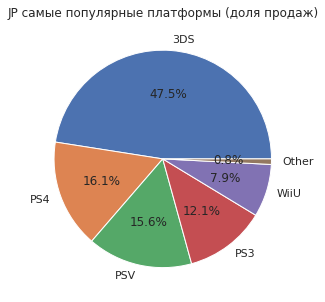

In [367]:
jp_v = actual_period.loc[actual_period['jp_sales']>0].groupby('platform')['jp_sales'].sum().sort_values(ascending=False).reset_index()

TOP = 5
df2 = jp_v.iloc[:TOP]
df2 = df2.append({'platform': 'Other', 'jp_sales': jp_v['jp_sales'].iloc[TOP:].sum()},
                 ignore_index=True)
df2.set_index('platform').plot.pie(y='jp_sales', legend=False, label="", autopct='%1.1f%%', figsize=(5,5), title = 'JP самые популярные платформы (доля продаж)');

In [368]:
platform_count_full = jp_v['jp_sales'].sum()
jp_v['persent'] = (jp_v['jp_sales']/platform_count_full*100).round(2)

Самые популярные платформы Японии: 3DS, PS4, PSV, PS3, WiiU. Если рассматривать долю продаж, лидирует PSV? платформы немно меняются местами, но остаются те же топ 5 платформ.

### Определю для пользователя каждого региона (NA, EU, JP) cамые популярные жанры (топ-5).
 

Самые популярные жанры (топ-5) Северной Америки

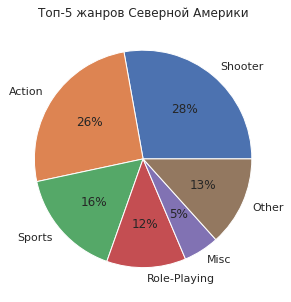

In [369]:
genre_na = actual_period.loc[actual_period['na_sales']>0].groupby('genre')['na_sales'].sum().sort_values(ascending=False).reset_index()

TOP = 5
df1 = genre_na.iloc[:TOP]
df1 = df1.append({'genre': 'Other', 'na_sales': genre_na['na_sales'].iloc[TOP:].sum()},
                 ignore_index=True)
df1.set_index('genre').plot.pie(y='na_sales', legend=False, label="", figsize=(5,5), title = 'Топ-5 жанров Северной Америки', autopct='%1.0f%%');

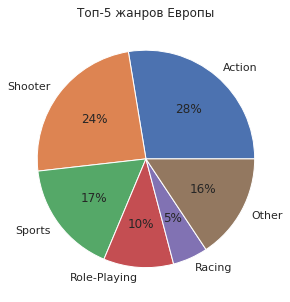

In [370]:
genre_eu = actual_period.loc[actual_period['eu_sales']>0].groupby('genre')['eu_sales'].sum().sort_values(ascending=False).reset_index()

TOP = 5
df3 = genre_eu.iloc[:TOP]
df3 = df3.append({'genre': 'Other', 'eu_sales': genre_eu['eu_sales'].iloc[TOP:].sum()},
                 ignore_index=True)
df3.set_index('genre').plot.pie(y='eu_sales', legend=False, label="", figsize=(5,5), title = 'Топ-5 жанров Европы',autopct='%1.0f%%');

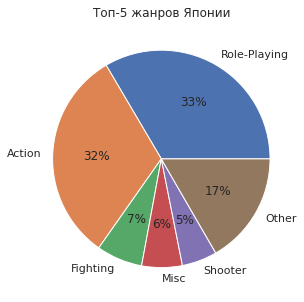

In [371]:
genre_jp = actual_period.loc[actual_period['jp_sales']>0].groupby('genre')['jp_sales'].sum().sort_values(ascending=False).reset_index()
TOP = 5
df2 = genre_jp.iloc[:TOP]
df2 = df2.append({'genre': 'Other', 'jp_sales': genre_jp['jp_sales'].iloc[TOP:].sum()},
                 ignore_index=True)
df2.set_index('genre').plot.pie(y='jp_sales', legend=False, label="", figsize=(5,5), title = 'Топ-5 жанров Японии',autopct='%1.0f%%');

Игровые жанры в Северной Америке и Европе довольно схожи, лидируют Action и Shooter(поджанр видеоигр-экшенов), третье и четвертое место Sports и Role-Playing.
В Японии популярные жанры отличаются,  первое место Role-Playing(ролевые игры), далее Action, Fighting, Misc и Shooter.


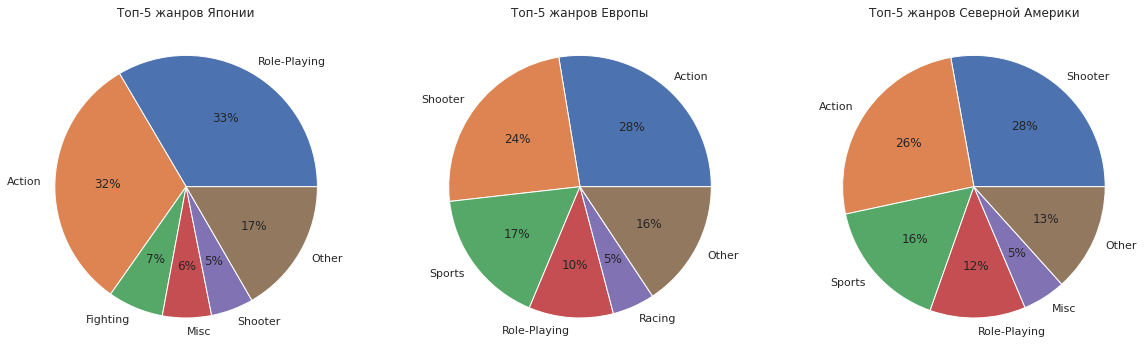

In [396]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(20, 20))

df2.set_index('genre').plot.pie(y='jp_sales', legend=False, label="",   title = 'Топ-5 жанров Японии',autopct='%1.0f%%', ax=axes[0]);
df3.set_index('genre').plot.pie(y='eu_sales', legend=False, label="", title = 'Топ-5 жанров Европы',autopct='%1.0f%%', ax=axes[1]);
df1.set_index('genre').plot.pie(y='na_sales', legend=False, label="", title = 'Топ-5 жанров Северной Америки', autopct='%1.0f%%', ax=axes[2]);


### Рассмотрю влияет ли рейтинг ESRB на продажи в отдельном регионе.

Так как рейтинг ESRB предназначен для маркировки игр для США и Канады сделаю заглушку на пропуски (поменяю пропуски на 0) и посмотрю распределение рейтингов по регионам.

In [302]:
pd.set_option('chained_assignment', None)
actual_period['rating'] = actual_period['rating'].fillna('A')#устанавливаю заглушку 'А'

Рассмотрю Северную Америку

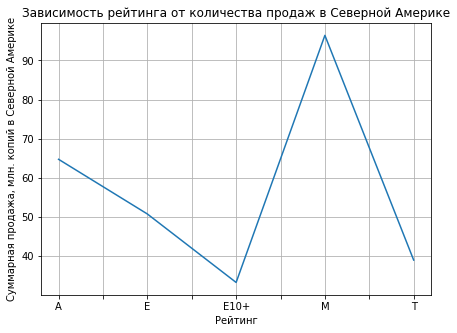

In [300]:

actual_period.query('na_sales > 0').groupby('rating')['na_sales'].sum().plot(x = 'rating', y = 'na_sales', figsize=(7,5), grid=True, title = 'Зависимость рейтинга от количества продаж в Северной Америке')
plt.xlabel('Рейтинг')
plt.ylabel('Суммарная продажа, млн. копий в Северной Америке');

Рассмотрю Европу

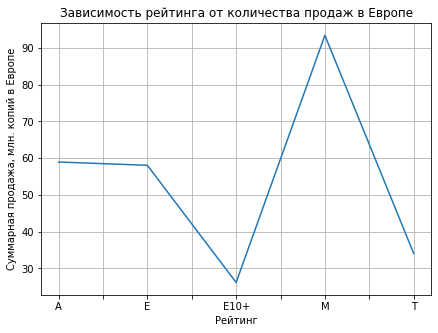

In [303]:
actual_period.query('eu_sales > 0').groupby('rating')['eu_sales'].sum().plot(x = 'rating', y = 'eu_sales', figsize=(7,5), grid=True, title = 'Зависимость рейтинга от количества продаж в Европе')
plt.xlabel('Рейтинг')
plt.ylabel('Суммарная продажа, млн. копий в Европе');

Рассмотрю Японию

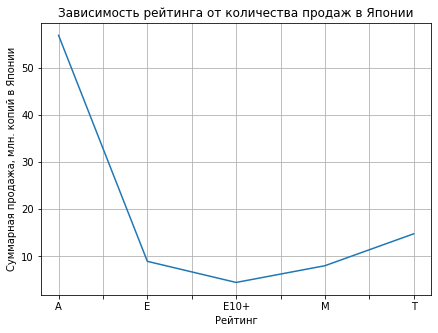

In [304]:
actual_period.query('jp_sales > 0').groupby('rating')['jp_sales'].sum().plot(x = 'rating', y = 'jp_sales', figsize=(7,5), grid=True, title = 'Зависимость рейтинга от количества продаж в Японии')
plt.xlabel('Рейтинг')
plt.ylabel('Суммарная продажа, млн. копий в Японии');

Если делать вывод на основании рейтинга ESRB, то самый популярный рейтинг в Северной Америке и Европе - М (взрослые), а в Японии более популярны игры без рейтинга. Но стоит заметить, что довольно большая доля игр без рейтинга и в Европе и Северной Америке.

Самый антипопулярные рейтинг в регионах совпадает - Е10+ (дети старше 10 лет)


## Гипотезы

### Средние пользовательские рейтинги платформ Xbox One и PC одинаковые

H0: средние рейтинги по платформам Xbox One и PC одинаковые
H1: средние рейтинги по платформам разные

In [57]:
from scipy import stats as st
import numpy as np
sample_1 = actual_period.loc[(actual_period['platform'] == 'XOne') & (actual_period['user_score'].notna())]['user_score']#выборка по платформе XOne
sample_2 = actual_period.loc[(actual_period['platform'] == 'PC') & (actual_period['user_score'].notna())]['user_score']#выборка по платформе PC 

alpha = 0.05#задаю пороговое значение альфа
results = st.ttest_ind(sample_1, sample_2, equal_var=False)
display('p-знач', results.pvalue)

if results.pvalue < alpha:#если p-value окажется меньше порогового значения альфа - отвергаем нулевую гипотезу
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получается отвергнуть нулевую гипотезу')
        

'p-знач'

0.11601398086668832

Не получается отвергнуть нулевую гипотезу


In [58]:
sample_1 = actual_period.loc[(actual_period['platform'] == 'XOne') & (actual_period['user_score'].notna())]['user_score'].mean().round(2)
sample_2 = actual_period.loc[(actual_period['platform'] == 'PC') & (actual_period['user_score'].notna())]['user_score'].mean().round(2)

display(sample_1)#проверка

display(sample_2)#проверка

6.59

6.3

Вывод: нулевая гипотеза не отвергается, скорее всего, предположение всё-таки неверно.

Значение p-value показывает: вероятность случайно получить такое или большее различие равно почти 12%, это явно слишком большая вероятность, чтобы делать вывод о значимом различии между средними рейтинги по платформам Xbox One и PC.


### Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.

H0: средние пользовательские рейтинги жанров Action и Sports одинаковые
H1: средние пользовательские рейтинги жанров Action и Sports разные

In [59]:
from scipy import stats as st
import numpy as np
sample_11 = actual_period.loc[(actual_period['genre'] == 'Action') & (actual_period['user_score'].notna())]['user_score']#выборка по жанру Action
sample_22 = actual_period.loc[(actual_period['genre'] == 'Sports') & (actual_period['user_score'].notna())]['user_score']#выборка по жанру Sports
alpha = 0.05#задаю пороговое значение альфа

results = st.ttest_ind(sample_11, sample_22, equal_var=False)
display('p-знач', results.pvalue)
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получается отвергнуть нулевую гипотезу')

'p-знач'

1.1825550382644557e-14

Отвергаем нулевую гипотезу


На имеющихся данных, на уровне значимости 5% есть основания отвергнуть нулевую гипотезу о равенстве средних значений пользовательских рейтингов (отзывов) жанров Action и Sports в пользу альтернативной гипотезы.</font>

In [60]:
sample_11 = actual_period.loc[(actual_period['genre'] == 'Action') & (actual_period['user_score'].notna())]['user_score'].mean().round(2)
sample_22 = actual_period.loc[(actual_period['genre'] == 'Sports') & (actual_period['user_score'].notna())]['user_score'].mean().round(2)
display(sample_11)#проверка

display(sample_22)#проверка

6.76

5.23

Вывод:
    
Отвергаем нулевую гипотезу, в пользу альтернативной, так как вероятность получить такие данные очень низка. Значение p-value показывает: вероятность случайно получить такое или большее различие равно 0%.
    


Формулирование гипотез.
    
В нулевой гипотезе есть какое-то равенство, а альтернативная гипотеза, противоречит нулевой гипотезе. Поэтому исходя из задания  "Средние пользовательские рейтинги платформ Xbox One и PC одинаковые"

H0: средние рейтинги по платформам Xbox One и PC одинаковые H1: средние рейтинги по платформам разные

Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.

H0: средние пользовательские рейтинги жанров Action и Sports одинаковые H1: средние пользовательские рейтинги жанров Action и Sports разные. 

Критерии для проверки гипотез.
    
В результате эксперимента мы сравниваем средние двух генеральных совокупностей. Чем дальше разница выборочных средних от значения, предполагаемого в H₀, тем p-value меньше. Значение p-value показывает: вероятность случайно получить такое или большее различие. Далее мы смотрим попала ли наша разница по выборкам в  5% (хвосты графика) мы выбрали такой уровень значимости(альфа =5%) и на основании этого отвергаем или нет нулевую гипотезу.
        
    
На основании экспериментальных даннных мы не можем подтверждать гипотезу. Ели данные гипотезе не противоречат, тогда не отвергаем Если же вы приходим к выводу, что вероятность получить такие данные очень низка, появляется основание отбросить эту гипотезу.

## Общий вывод

Для прогноза кампании на 2017 год в результате изучения всех данных был определен актуальный период исследования - 2014-2016 год, данный период был определен исходя из "срока жизни" платформ (отброшены неактуальные платформы). Так как в 2015 году является переломным в плане продаж, для более полного анализа я решила добавить 2014 год.

В результате имеем:
Топ-5 популярных платформ:
- PS4
- XOne
- 3DS	
- PS3
- X360	

Лиинейная связи между продажами и оценкой пользователей/критиков очень слабая. Но все же игры с высокими оценками пользователей(7-9) и критиков(65-90)  более продаваемые.

Cамые популярные жанры и самые прибыльные почти совпадают.
Топ 5 самых популярных жанров:
- Action          
- Role-Playing    
- Adventure       
- Sports          
- Shooter  
Топ 5 самых прибыльных жанров:
- Action	
- Shooter	
- Sports	
- Role-Playing	
- Misc	
 
Самые популярные платформы Северной Америки: PS4, XOne, X360, 3DS, PS3. Интересно, что если рассматривать долю продаж, то платформы немно меняются местами, но остаются те же топ 5 платформ.

Самые популярные платформы Европы: PS4, XOne, X360, 3DS, PS3. Интересно, что если рассматривать долю продаж, то появляется платформа РС вместо X360.

Самые популярные платформы Японии: 3DS, PS4, PSV, PS3, WiiU. Если рассматривать долю продаж, лидирует PSV? платформы немно меняются местами, но остаются те же топ 5 платформ.

Игровые жанры в Северной Америке и Европе довольно схожи, лидируют Action и Shooter(поджанр видеоигр-экшенов), третье и четвертое место Sports и Role-Playing.
В Японии популярные жанры отличаются,  первое место Role-Playing(ролевые игры), далее Action, Fighting, Misc и Shooter.

Самый популярный рейтинг в Северной Америке и Европе - М (взрослые), в Японии - Т (подростки).
Самый антипопулярные рейтинг в регионах совпадает - Е10+ (дети старше 10 лет)

Средние пользовательские рейтинги платформ Xbox One и PC разные, и средние пользовательские рейтинги Action и Sports разные.

На 2017 год ставку можно делать на платформу PS4, т.к. она более популярна. Среди жанров отмечу  Shooter,Action и Role-Playing. Возрастные категории M и Т пользуется большим спросом.

По результатам получилось следующее:
1. Лучше вложиться в платформы PS4, XOne
2. Наиболее продаваемые жанры Shooter, Sports
3. Наиболее популярный рейтинг М, но для Европы и Северной Америки, чтобы определить для Японии нам недостаточно данных.

